           dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil
(459, 3)
               dt  AverageTemperature     State
350773 2001-01-01              -2.592  Nebraska
350774 2001-02-01              -5.575  Nebraska
350775 2001-03-01               2.077  Nebraska
350776 2001-04-01              10.431  Nebraska
350777 2001-05-01              15.878  Nebraska
          dt  AverageTemperature
0 2001-01-01           -4.480333
1 2001-02-01           -7.541000
2 2001-03-01            0.590333
3 2001-04-01            7.889000
4 2001-05-01           13.908667


/var/folders/kq/hnthm8cj0b15xjhj27f656qc0000gn/T/ipykernel_32524/1752257000.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dt'] = pd.to_datetime(df_filtered['dt'])


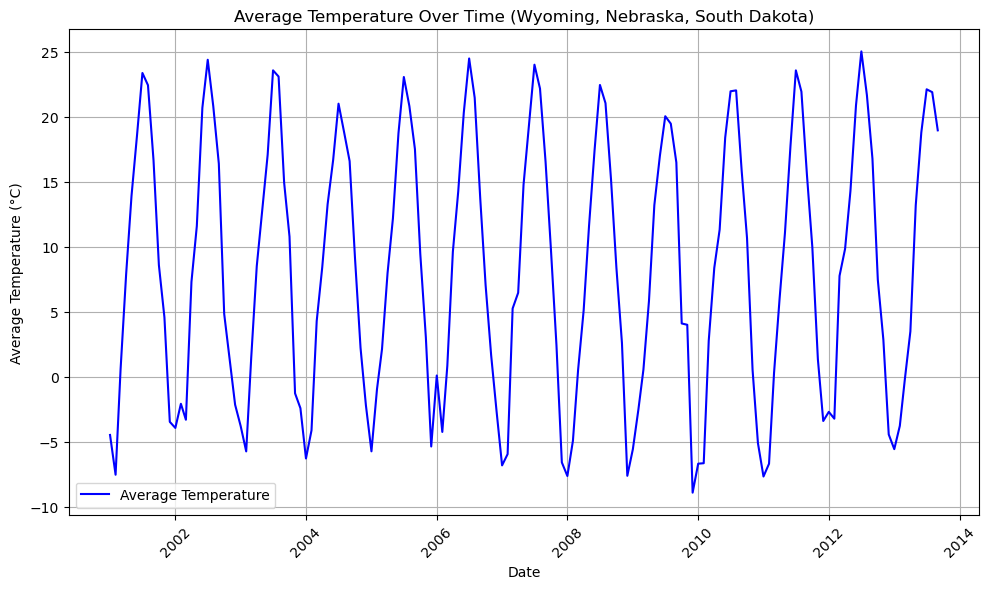

          dt  AverageTemperature  Date_num
0 2001-01-01           -4.480333         0
1 2001-02-01           -7.541000        31
2 2001-03-01            0.590333        59
3 2001-04-01            7.889000        90
4 2001-05-01           13.908667       120
Initial guess for parameters: [10, 0.01721420632103996, 0, 8.23681045751634]
Fitted parameters:
A = 13.90 ± 0.23
B = 0.017202 ± 0.000012
C = -1.62 ± 0.03
D = 8.17 ± 0.16


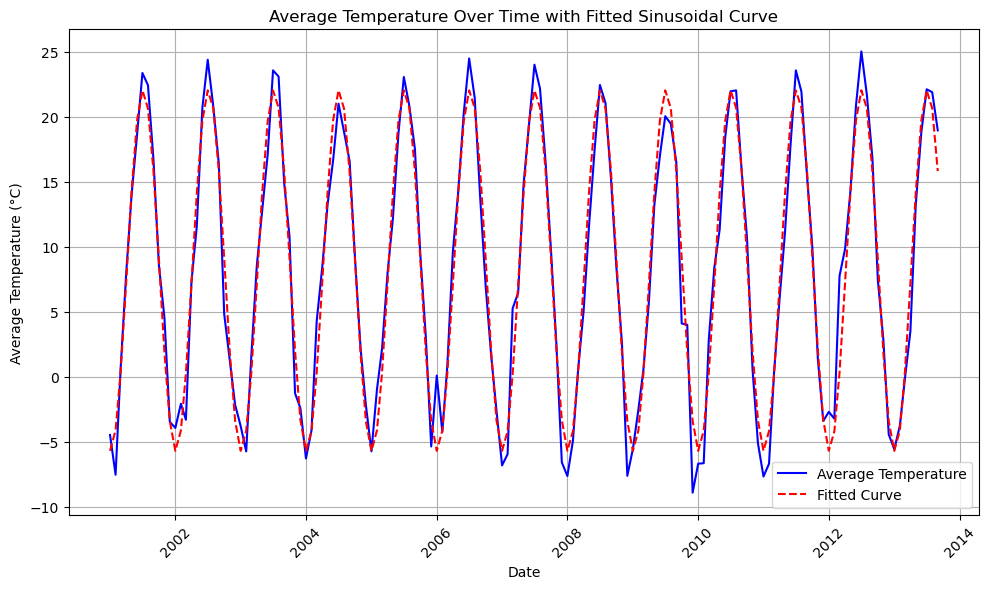

Fitted parameters and their errors:
A = 13.90 ± 0.23
B = 0.017202 ± 0.000012
C = -1.62 ± 0.03
D = 8.17 ± 0.16

Final equation of the fitted curve:
y(x) = 13.90 * sin(0.017202 * x + -1.62) + 8.17
Fitted parameters and their errors:
A = 13.90 ± 0.23
B = 0.017202 ± 0.000012
C = -1.62 ± 0.03
D = 8.17 ± 0.16

Final equation of the fitted curve:
y(x) = 13.90 * sin(0.017202 * x + -1.62) + 8.17


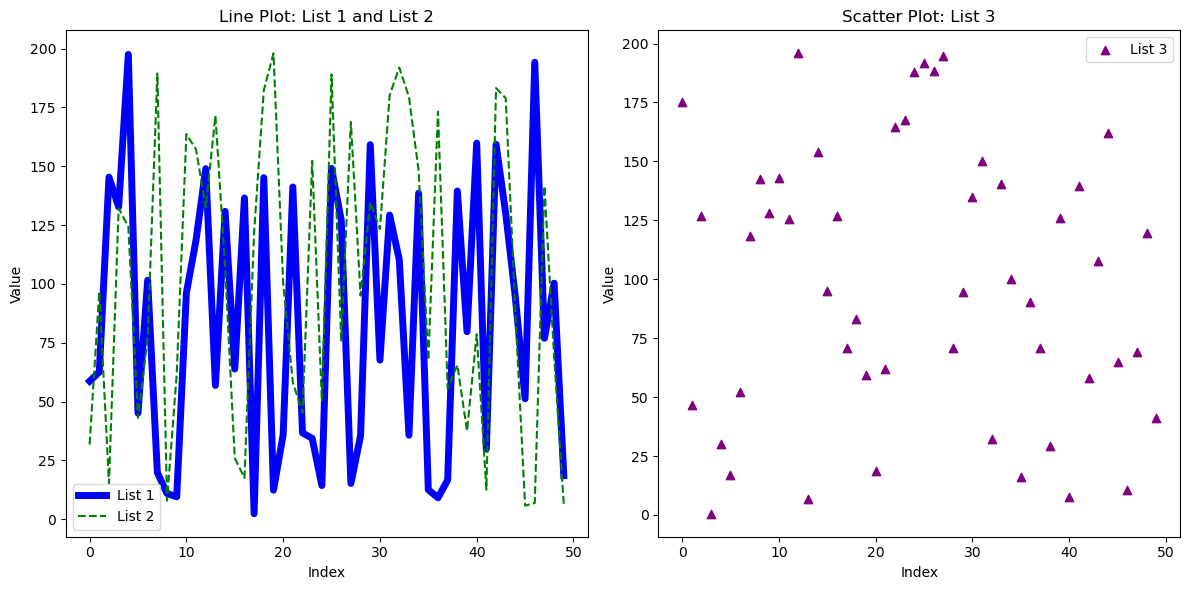

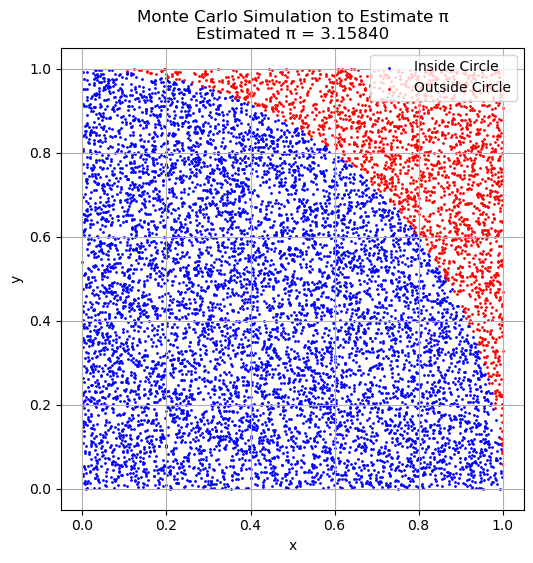

In [ ]:
# Question 1.a

import pandas as pd

file_path = 'GlobalLandTemperaturesByState.csv'
df = pd.read_csv(file_path)
print(df.head())

df_filtered = df[['dt', 'AverageTemperature', 'State']]

df_filtered['dt'] = pd.to_datetime(df_filtered['dt'])

df_filtered = df_filtered[df_filtered['dt'].dt.year > 2000]

df_filtered = df_filtered[df_filtered['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]

print(df_filtered.shape)
print(df_filtered.head())


# 1.b

df_avg_temp = df_filtered.groupby('dt')['AverageTemperature'].mean().reset_index()
print(df_avg_temp.head())


# 1.c

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_avg_temp['dt'], df_avg_temp['AverageTemperature'], label='Average Temperature', color='b')

plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time (Wyoming, Nebraska, South Dakota)')

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


# 1.d

df_avg_temp['dt'] = pd.to_datetime(df_avg_temp['dt'])
df_avg_temp['Date_num'] = (df_avg_temp['dt'] - df_avg_temp['dt'].min()).dt.days
print(df_avg_temp.head())


# 1.e

import numpy as np
def sinusoidal_model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

A_guess = 10  
B_guess = 2 * np.pi / 365  
C_guess = 0  
D_guess = df_avg_temp['AverageTemperature'].mean() 

initial_guess = [A_guess, B_guess, C_guess, D_guess]

print(f"Initial guess for parameters: {initial_guess}")


# 1.f

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sinusoidal_model, df_avg_temp['Date_num'], df_avg_temp['AverageTemperature'], p0=initial_guess)

A_fit, B_fit, C_fit, D_fit = popt
A_error, B_error, C_error, D_error = np.sqrt(np.diag(pcov))

print(f"Fitted parameters:")
print(f"A = {A_fit:.2f} ± {A_error:.2f}")
print(f"B = {B_fit:.6f} ± {B_error:.6f}")
print(f"C = {C_fit:.2f} ± {C_error:.2f}")
print(f"D = {D_fit:.2f} ± {D_error:.2f}")


# 1.g

plt.figure(figsize=(10, 6))
plt.plot(df_avg_temp['dt'], df_avg_temp['AverageTemperature'], label='Average Temperature', color='b')

fitted_curve = sinusoidal_model(df_avg_temp['Date_num'], *popt)
plt.plot(df_avg_temp['dt'], fitted_curve, label='Fitted Curve', color='r', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time with Fitted Sinusoidal Curve')

plt.grid(True)
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


# 1.h

print(f"Fitted parameters and their errors:")
print(f"A = {A_fit:.2f} ± {A_error:.2f}")
print(f"B = {B_fit:.6f} ± {B_error:.6f}")
print(f"C = {C_fit:.2f} ± {C_error:.2f}")
print(f"D = {D_fit:.2f} ± {D_error:.2f}")

print("\nFinal equation of the fitted curve:")
print(f"y(x) = {A_fit:.2f} * sin({B_fit:.6f} * x + {C_fit:.2f}) + {D_fit:.2f}")


# 1.i

print(f"Fitted parameters and their errors:")
print(f"A = {A_fit:.2f} ± {A_error:.2f}")
print(f"B = {B_fit:.6f} ± {B_error:.6f}")
print(f"C = {C_fit:.2f} ± {C_error:.2f}")
print(f"D = {D_fit:.2f} ± {D_error:.2f}")

print("\nFinal equation of the fitted curve:")
print(f"y(x) = {A_fit:.2f} * sin({B_fit:.6f} * x + {C_fit:.2f}) + {D_fit:.2f}")

with open("fitted_curve_results.txt", "w") as f:
    f.write(f"Fitted parameters and their errors:\n")
    f.write(f"A = {A_fit:.2f} ± {A_error:.2f}\n")
    f.write(f"B = {B_fit:.6f} ± {B_error:.6f}\n")
    f.write(f"C = {C_fit:.2f} ± {C_error:.2f}\n")
    f.write(f"D = {D_fit:.2f} ± {D_error:.2f}\n")
    f.write(f"\nFinal equation of the fitted curve:\n")
    f.write(f"y(x) = {A_fit:.2f} * sin({B_fit:.6f} * x + {C_fit:.2f}) + {D_fit:.2f}\n")





# Question 2

import numpy as np
import matplotlib.pyplot as plt

list_1 = np.random.uniform(0, 200, 50)
list_2 = np.random.uniform(0, 200, 50)
list_3 = np.random.uniform(0, 200, 50)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(list_1, label='List 1', color='blue', linewidth=5)
axs[0].plot(list_2, label='List 2', color='green', linestyle='--')
axs[0].set_title('Line Plot: List 1 and List 2')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].legend()

axs[1].scatter(range(50), list_3, color='purple', marker='^', label='List 3')
axs[1].set_title('Scatter Plot: List 3')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')
axs[1].legend()

plt.tight_layout()
plt.show()





# Question 3

import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(N):
    x = np.random.rand(N)
    y = np.random.rand(N)

    inside_circle = x**2 + y**2 <= 1  
    
    pi_estimate = 4 * np.sum(inside_circle) / N  
    return pi_estimate, x, y, inside_circle

N = 10**4
pi_estimate, x, y, inside_circle = estimate_pi(N)

plt.figure(figsize=(6,6))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')  
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')  

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Monte Carlo Simulation to Estimate π\nEstimated π = {pi_estimate:.5f}")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  
plt.grid(True)

plt.show()


def plot_pi_estimates():
    N_values = [10**4, 10**5, 10**6, 10**7]
    pi_estimates = []

    for N in N_values:
        pi_estimate, _, _, _ = estimate_pi(N)
        pi_estimates.append(pi_estimate)
    
    plt.figure(figsize=(8, 6))
    plt.plot(N_values, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated π')
    plt.axhline(y=np.pi, color='r', linestyle='--', label='True π')
    plt.xscale('log')
    plt.yscale('linear')
    plt.xlabel('Number of Points (N) (log scale)')
    plt.ylabel('Estimated π')
    plt.title('Monte Carlo Simulation: Estimating π for Different N')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pi_estimates()
